In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

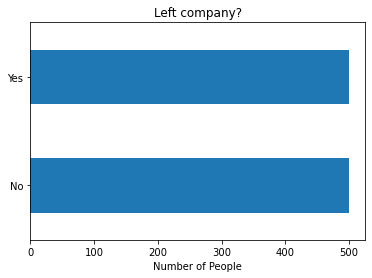

In [2]:
# insert code
#df['left_company'].hist()
df['left_company'].value_counts().plot.barh()
plt.title('Left company?')
plt.xlabel('Number of People')
plt.show()

Target left_company has equal number of both 'Yes' and 'No' values. There is no class imbalace for this target.

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [3]:
numerical_vars = df.select_dtypes(exclude= "object")
numerical_vars = numerical_vars.columns.tolist()
numerical_vars

['age',
 'commuting_distance',
 'education',
 'satisfaction_with_environment',
 'seniority_level',
 'satisfaction_with_job',
 'last_raise_pct',
 'last_performance_rating',
 'total_years_working',
 'years_at_company',
 'years_in_current_job',
 'years_since_last_promotion',
 'years_with_current_supervisor']

In [4]:
categorical_vars = df.select_dtypes(include= "object")
categorical_vars= categorical_vars.columns.tolist()
categorical_vars

['left_company',
 'frequency_of_travel',
 'department',
 'gender',
 'position',
 'married_or_single']

In [5]:
# Removing the left_company variable since it is a target variable.

categorical_vars.remove('left_company')
categorical_vars

['frequency_of_travel',
 'department',
 'gender',
 'position',
 'married_or_single']

If we divide the variables based on the data types only ('left_company',  'frequency_of_travel', 'department', 'gender', 'position', 'married_or_single') these variables have object data type. Other than these variables all variables are of numeric data type. 

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [6]:
# insert code here
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:

X_variables = df[numerical_vars]

In [8]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [9]:
vif_data

,feature,VIF
0,age,27.168360
1,commuting_distance,2.433846
2,education,8.740078
3,satisfaction_with_environment,6.173071
4,seniority_level,10.701452
5,satisfaction_with_job,6.347144
6,last_raise_pct,39.030498
7,last_performance_rating,74.177763
8,total_years_working,11.666810
9,years_at_company,9.740221


In [10]:
numerical_vars.remove('age')
numerical_vars.remove('last_raise_pct')
numerical_vars.remove('last_performance_rating')

In [11]:
numerical_vars

['commuting_distance',
 'education',
 'satisfaction_with_environment',
 'seniority_level',
 'satisfaction_with_job',
 'total_years_working',
 'years_at_company',
 'years_in_current_job',
 'years_since_last_promotion',
 'years_with_current_supervisor']

To identify the multicollinearity in numerical variables The Variance Inflation Factor (VIF) is used.It represents how well the variable is explained by other independent variables. Result shows 'age','last_raise_pct','last_performance_rating' have high VIF score so removing those variables. 

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [12]:
# insert code here
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'left_company']

X = df[features]
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [13]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('scale', StandardScaler())
                        ])

car_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

In [14]:
num_pipeline.fit_transform(X_train[numerical_vars])[0,:]

array([-0.33873757,  0.12174871,  0.32237142,  1.02098189,  0.33259888,
        0.85269911,  0.24623625,  0.32851531, -0.34561971,  0.63351643])

In [15]:
car_pipeline.fit_transform(X_train[categorical_vars])[0,:].todense()

matrix([[0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.]])

In [16]:
car_pipeline.fit_transform(X_train[categorical_vars])

<800x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3383 stored elements in Compressed Sparse Row format>

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [17]:
# insert code here
from sklearn.linear_model import LogisticRegression
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_vars),
                                                      ('create_dummies', car_pipeline, categorical_vars)])
modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty='none'))])

In [18]:
model=modeling_pipeline.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
modeling_pipeline.score(X_train,y_train)

0.72

In [20]:
modeling_pipeline.score(X_test,y_test)

0.66

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

NameError: name 'y_predicted' is not defined

In [ ]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=model):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label='Yes')
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

In [ ]:

roc_auc_score(y_train, generate_probs(X_train))

Training score is higher than the test score so model is not overfitting. 

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

We can use Gradient descent an optimization technique from which we can learn what the coefficients should be by iteration and continuous improvment.